## Imports

In [32]:
from numpy.random import seed
seed(888)
from tensorflow import set_random_seed
set_random_seed(404)

In [33]:
import os
import numpy as np
import tensorflow as tf
import keras 
from keras.datasets import cifar10
from keras.models import Sequential #for neural_network
from keras.layers import Dense, Activation, Dropout #for neural_network

from IPython.display import display
from keras.preprocessing.image import array_to_img
from keras.preprocessing.image import img_to_array
from keras.callbacks import TensorBoard

from time import strftime

import matplotlib.pyplot as plt

%matplotlib inline

## Constants

In [3]:
LOG_DIR = '/Users/sagarcbellad/MLProjects/NeuralNets/Tensorboards'

LABEL_NAMES = ['Plane','Car','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']
IMAGE_WIDTH = 32
IMAGE_HEIGHT = 32
IMAGE_PIXELS = IMAGE_WIDTH * IMAGE_HEIGHT
COLOR_CHANNELS = 3
TOTAL_INPUTS = IMAGE_PIXELS * COLOR_CHANNELS

VALIDATION_SIZE = 10000
SMALL_TRAIN_SIZE = 1000

## Get the Data

In [4]:
(x_train_all, y_train_all),(x_test, y_test) = cifar10.load_data()

In [5]:
type(cifar10)
type(x_train_all)

numpy.ndarray

## Explore the Data

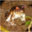

In [6]:
display(array_to_img(x_train_all[0]))

In [7]:
y_train_all[0][0]

6

In [8]:
LABEL_NAMES[y_train_all[7][0]]

'Horse'

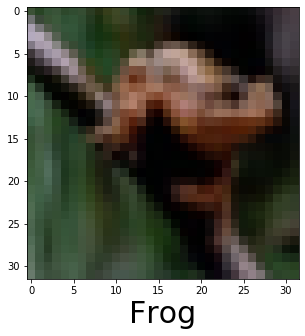

In [9]:
plt.figure(figsize=(15,5))
plt.imshow(x_train_all[5000])
plt.xlabel(LABEL_NAMES[y_train_all[5000][0]], size=30)
plt.show()

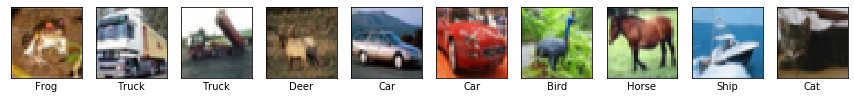

In [10]:
plt.figure(figsize=(15,5))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(LABEL_NAMES[y_train_all[i][0]])
    plt.imshow(x_train_all[i])

In [11]:
x_train_all.shape

(50000, 32, 32, 3)

In [12]:
nr_images, x, y, c = x_train_all.shape
print(f'images = {nr_images} \t| width = {x} \t| height = {y} \t| channels = {c}')

images = 50000 	| width = 32 	| height = 32 	| channels = 3


## Preprocess Data

In [13]:
type(x_train_all[0][0][0][0])

numpy.uint8

In [14]:
x_train_all, x_test = x_train_all/255, x_test/255

In [15]:
x_train_all[0][0][0][0]

0.23137254901960785

In [16]:
x_train_all = x_train_all.reshape(x_train_all.shape[0], TOTAL_INPUTS)

In [17]:
x_train_all.shape

(50000, 3072)

In [18]:
x_test = x_test.reshape(len(x_test), TOTAL_INPUTS)

In [19]:
print(x_test.shape)

(10000, 3072)


## Create Validation Dataset

In [20]:
x_val = x_train_all[:VALIDATION_SIZE]
y_val = y_train_all[:VALIDATION_SIZE]
x_val.shape

(10000, 3072)

In [21]:
x_train = x_train_all[VALIDATION_SIZE:]
y_train = y_train_all[VALIDATION_SIZE:]
x_train.shape

(40000, 3072)

## Create a small dataset

In [22]:
x_train_xs = x_train_all[:SMALL_TRAIN_SIZE]
y_train_xs = y_train_all[:SMALL_TRAIN_SIZE]

# Defining the neural networks using Keras

In [23]:
#Our Neural Network..1(method_1)
model_1 = Sequential([
    Dense(units=128, input_dim=TOTAL_INPUTS, activation='relu', name='m1_hiddenLayer_1'), #hiddenLayer1
    Dense(units=64, activation='relu', name='m1_hiddenLayer_2'), #hiddenLayer2
    Dense(units=16, activation='relu', name='m1_hiddenLayer_3'), #hiddenLayer3
    Dense(units=10, activation='softmax', name='m1_OutputLayer') #OutputLayer-units=10 cuz we have 10 different outputs
])

#compiling Model
model_1.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [48]:
##Our Neural Network..2(method_2)
model_2 = Sequential()
model_2.add(Dropout(rate=0.2, seed=42, input_shape=(TOTAL_INPUTS,))) #0.2 means 20% probablity and seed is again a randomizer
model_2.add(Dense(units=128, activation='relu', name='m2_hidden_layer_1'))
model_2.add(Dense(units=64, activation='relu', name='m2_hidden_layer_2'))
model_2.add(Dense(units=16, activation='relu', name='m2_hidden_layer_3'))
model_2.add(Dense(units=10, activation='softmax', name='m2_Output_layer'))

#model_2 compiler
model_2.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [57]:
##Our Neural Network..3(method_2)
model_3 = Sequential()
model_3.add(Dropout(rate=0.2, seed=42, input_shape=(TOTAL_INPUTS,)))
model_3.add(Dense(units=128, activation='relu', name='m3_hidden_layer_1'))
model_3.add(Dropout(rate=0.25, seed=42, input_shape=(TOTAL_INPUTS,)))
model_3.add(Dense(units=64, activation='relu', name='m3_hidden_layer_2'))
model_3.add(Dense(units=16, activation='relu', name='m3_hidden_layer_3'))
model_3.add(Dense(units=10, activation='softmax', name='m3_output_layer'))

#module_3 compiler
model_3.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [24]:
type(model_1)

keras.engine.sequential.Sequential

In [25]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hiddenLayer_1 (Dense)        (None, 128)               393344    
_________________________________________________________________
hiddenLayer_2 (Dense)        (None, 64)                8256      
_________________________________________________________________
hiddenLayer_3 (Dense)        (None, 16)                1040      
_________________________________________________________________
OutputLayer (Dense)          (None, 10)                170       
Total params: 402,810
Trainable params: 402,810
Non-trainable params: 0
_________________________________________________________________


In [58]:
model_2.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_9 (Dropout)          (None, 3072)              0         
_________________________________________________________________
m2_hidden_layer_1 (Dense)    (None, 128)               393344    
_________________________________________________________________
m2_hidden_layer_2 (Dense)    (None, 64)                8256      
_________________________________________________________________
m2_hidden_layer_3 (Dense)    (None, 16)                1040      
_________________________________________________________________
m2_Output_layer (Dense)      (None, 10)                170       
Total params: 402,810
Trainable params: 402,810
Non-trainable params: 0
_________________________________________________________________


In [59]:
model_3.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_12 (Dropout)         (None, 3072)              0         
_________________________________________________________________
m3_hidden_layer_1 (Dense)    (None, 128)               393344    
_________________________________________________________________
dropout_13 (Dropout)         (None, 128)               0         
_________________________________________________________________
m3_hidden_layer_2 (Dense)    (None, 64)                8256      
_________________________________________________________________
m3_hidden_layer_3 (Dense)    (None, 16)                1040      
_________________________________________________________________
m3_output_layer (Dense)      (None, 10)                170       
Total params: 402,810
Trainable params: 402,810
Non-trainable params: 0
_______________________________________________

In [26]:
(32*32*3*128+128)+(128*64+64)+(64*16+16)+(16*10+10)

402810

# TensorBoard(Visual Learning)

In [27]:
def get_tensorboard(modelname):
    folder_name = f'{modelname} at {strftime("%I %M")}'
    dir_paths = os.path.join(LOG_DIR, folder_name)

    try:
        os.makedirs(dir_paths)
    except OSError as err:
        print(err.strerror)
    else:
        print("Folder created successfully")
    
    return TensorBoard(log_dir=dir_paths)

## Fit the Model

In [28]:
samples_per_batch = 1000

In [29]:
%%time

nr_epochs = 150
model_1.fit(x_train_xs, y_train_xs, 
            batch_size=samples_per_batch, 
            epochs=nr_epochs,
            callbacks=[get_tensorboard('model_1')],
            validation_data=(x_val, y_val))

Folder created successfully
Train on 1000 samples, validate on 10000 samples
Epoch 1/150
1000/1000 [==============================] - 1s 555us/step - loss: 2.3233 - accuracy: 0.0840 - val_loss: 2.4252 - val_accuracy: 0.1037
Epoch 2/150
1000/1000 [==============================] - 0s 326us/step - loss: 2.4160 - accuracy: 0.1080 - val_loss: 2.4136 - val_accuracy: 0.0999
Epoch 3/150
1000/1000 [==============================] - 0s 339us/step - loss: 2.4132 - accuracy: 0.0990 - val_loss: 2.3088 - val_accuracy: 0.1013
Epoch 4/150
1000/1000 [==============================] - 0s 336us/step - loss: 2.3084 - accuracy: 0.1020 - val_loss: 2.2974 - val_accuracy: 0.0972
Epoch 5/150
1000/1000 [==============================] - 0s 337us/step - loss: 2.2925 - accuracy: 0.1120 - val_loss: 2.3049 - val_accuracy: 0.1577
Epoch 6/150
1000/1000 [==============================] - 0s 332us/step - loss: 2.2940 - accuracy: 0.1750 - val_loss: 2.2954 - val_accuracy: 0.1515
Epoch 7/150
1000/1000 [==================

Epoch 56/150
1000/1000 [==============================] - 0s 332us/step - loss: 1.8782 - accuracy: 0.3750 - val_loss: 2.0576 - val_accuracy: 0.2698
Epoch 57/150
1000/1000 [==============================] - 0s 328us/step - loss: 1.8588 - accuracy: 0.3690 - val_loss: 2.0558 - val_accuracy: 0.2657
Epoch 58/150
1000/1000 [==============================] - 0s 340us/step - loss: 1.8517 - accuracy: 0.3610 - val_loss: 2.0501 - val_accuracy: 0.2742
Epoch 59/150
1000/1000 [==============================] - 0s 341us/step - loss: 1.8436 - accuracy: 0.3650 - val_loss: 2.0458 - val_accuracy: 0.2746
Epoch 60/150
1000/1000 [==============================] - 0s 353us/step - loss: 1.8294 - accuracy: 0.3730 - val_loss: 2.0363 - val_accuracy: 0.2796
Epoch 61/150
1000/1000 [==============================] - 0s 356us/step - loss: 1.8183 - accuracy: 0.3810 - val_loss: 2.0309 - val_accuracy: 0.2818
Epoch 62/150
1000/1000 [==============================] - 0s 327us/step - loss: 1.8085 - accuracy: 0.3830 - val_

Epoch 112/150
1000/1000 [==============================] - 0s 324us/step - loss: 1.3892 - accuracy: 0.5500 - val_loss: 1.9419 - val_accuracy: 0.3305
Epoch 113/150
1000/1000 [==============================] - 0s 417us/step - loss: 1.3755 - accuracy: 0.5460 - val_loss: 1.9471 - val_accuracy: 0.3284
Epoch 114/150
1000/1000 [==============================] - 0s 373us/step - loss: 1.3716 - accuracy: 0.5460 - val_loss: 1.9551 - val_accuracy: 0.3271
Epoch 115/150
1000/1000 [==============================] - 0s 421us/step - loss: 1.3722 - accuracy: 0.5490 - val_loss: 1.9533 - val_accuracy: 0.3256
Epoch 116/150
1000/1000 [==============================] - 0s 344us/step - loss: 1.3666 - accuracy: 0.5450 - val_loss: 1.9538 - val_accuracy: 0.3271
Epoch 117/150
1000/1000 [==============================] - 0s 422us/step - loss: 1.3596 - accuracy: 0.5640 - val_loss: 1.9537 - val_accuracy: 0.3281
Epoch 118/150
1000/1000 [==============================] - 0s 329us/step - loss: 1.3569 - accuracy: 0.5510

In [62]:
%%time
nr_epochs=150
model_2.fit(x=x_train, y=y_train,
           batch_size=samples_per_batch,
           epochs=nr_epochs,
           callbacks=[get_tensorboard('model_2')],
           validation_data=(x_val, y_val))

Folder created successfully
Train on 40000 samples, validate on 10000 samples
Epoch 1/150
40000/40000 [==============================] - 5s 114us/step - loss: 2.1021 - accuracy: 0.1924 - val_loss: 2.0267 - val_accuracy: 0.2124
Epoch 2/150
40000/40000 [==============================] - 4s 112us/step - loss: 2.0536 - accuracy: 0.1993 - val_loss: 2.0083 - val_accuracy: 0.2068
Epoch 3/150
40000/40000 [==============================] - 4s 98us/step - loss: 2.0268 - accuracy: 0.2050 - val_loss: 1.9893 - val_accuracy: 0.2179
Epoch 4/150
40000/40000 [==============================] - 4s 89us/step - loss: 2.0095 - accuracy: 0.2150 - val_loss: 1.9775 - val_accuracy: 0.2300
Epoch 5/150
40000/40000 [==============================] - 4s 101us/step - loss: 1.9935 - accuracy: 0.2275 - val_loss: 1.9572 - val_accuracy: 0.2367
Epoch 6/150
40000/40000 [==============================] - 5s 120us/step - loss: 1.9751 - accuracy: 0.2384 - val_loss: 1.9450 - val_accuracy: 0.2642
Epoch 7/150
40000/40000 [=====

40000/40000 [==============================] - 4s 90us/step - loss: 1.3594 - accuracy: 0.5094 - val_loss: 1.4475 - val_accuracy: 0.4808
Epoch 111/150
40000/40000 [==============================] - 3s 83us/step - loss: 1.3567 - accuracy: 0.5105 - val_loss: 1.4393 - val_accuracy: 0.4849
Epoch 112/150
40000/40000 [==============================] - 3s 83us/step - loss: 1.3562 - accuracy: 0.5113 - val_loss: 1.4370 - val_accuracy: 0.4843
Epoch 113/150
40000/40000 [==============================] - 3s 83us/step - loss: 1.3508 - accuracy: 0.5151 - val_loss: 1.4452 - val_accuracy: 0.4763
Epoch 114/150
40000/40000 [==============================] - 3s 83us/step - loss: 1.3547 - accuracy: 0.5130 - val_loss: 1.4751 - val_accuracy: 0.4716
Epoch 115/150
40000/40000 [==============================] - 3s 87us/step - loss: 1.3564 - accuracy: 0.5131 - val_loss: 1.4403 - val_accuracy: 0.4820
Epoch 116/150
40000/40000 [==============================] - 3s 87us/step - loss: 1.3517 - accuracy: 0.5155 - val_

In [61]:
%%time
nr_epochs=150
model_3.fit(x=x_train, y=y_train,
            batch_size=samples_per_batch,
           epochs=nr_epochs,
           callbacks=[get_tensorboard('module_3')],
           validation_data=(x_val, y_val)) #here we are using x_train instead of x_train_xs to see what happens when we use an actual dataset

Folder created successfully
Train on 40000 samples, validate on 10000 samples
Epoch 1/150
40000/40000 [==============================] - 4s 90us/step - loss: 1.9432 - accuracy: 0.2988 - val_loss: 1.7961 - val_accuracy: 0.3620
Epoch 2/150
40000/40000 [==============================] - 4s 89us/step - loss: 1.8563 - accuracy: 0.3314 - val_loss: 1.7152 - val_accuracy: 0.3985
Epoch 3/150
40000/40000 [==============================] - 5s 115us/step - loss: 1.8209 - accuracy: 0.3465 - val_loss: 1.7109 - val_accuracy: 0.3929
Epoch 4/150
40000/40000 [==============================] - 5s 118us/step - loss: 1.7991 - accuracy: 0.3537 - val_loss: 1.6773 - val_accuracy: 0.4008
Epoch 5/150
40000/40000 [==============================] - 5s 137us/step - loss: 1.7760 - accuracy: 0.3616 - val_loss: 1.6692 - val_accuracy: 0.4112
Epoch 6/150
40000/40000 [==============================] - 5s 116us/step - loss: 1.7570 - accuracy: 0.3688 - val_loss: 1.6526 - val_accuracy: 0.4219
Epoch 7/150
40000/40000 [=====

Epoch 110/150
40000/40000 [==============================] - 3s 86us/step - loss: 1.4672 - accuracy: 0.4717 - val_loss: 1.4300 - val_accuracy: 0.4878
Epoch 111/150
40000/40000 [==============================] - 4s 90us/step - loss: 1.4729 - accuracy: 0.4680 - val_loss: 1.4343 - val_accuracy: 0.4938
Epoch 112/150
40000/40000 [==============================] - 4s 91us/step - loss: 1.4708 - accuracy: 0.4707 - val_loss: 1.4204 - val_accuracy: 0.4951
Epoch 113/150
40000/40000 [==============================] - 3s 86us/step - loss: 1.4632 - accuracy: 0.4709 - val_loss: 1.4218 - val_accuracy: 0.4950
Epoch 114/150
40000/40000 [==============================] - 3s 85us/step - loss: 1.4704 - accuracy: 0.4713 - val_loss: 1.4101 - val_accuracy: 0.4944
Epoch 115/150
40000/40000 [==============================] - 3s 85us/step - loss: 1.4664 - accuracy: 0.4727 - val_loss: 1.4298 - val_accuracy: 0.4929
Epoch 116/150
40000/40000 [==============================] - 1133s 28ms/step - loss: 1.4677 - accura

# Predictions on Individual Images

In [66]:
x_val[0].shape

(3072,)

In [67]:
test = np.expand_dims(x_val[0], axis=0)

In [68]:
test.shape

(1, 3072)

In [74]:
np.set_printoptions(precision=3)

In [75]:
model_3.predict(test)

array([[0.018, 0.019, 0.061, 0.105, 0.151, 0.066, 0.465, 0.104, 0.002,
        0.007]], dtype=float32)

In [78]:
model_3.predict(x_test)

array([[0.059, 0.022, 0.104, ..., 0.019, 0.071, 0.025],
       [0.105, 0.202, 0.005, ..., 0.002, 0.406, 0.273],
       [0.304, 0.086, 0.034, ..., 0.024, 0.305, 0.199],
       ...,
       [0.002, 0.001, 0.153, ..., 0.038, 0.003, 0.001],
       [0.02 , 0.011, 0.367, ..., 0.124, 0.008, 0.026],
       [0.024, 0.009, 0.063, ..., 0.547, 0.006, 0.023]], dtype=float32)

In [79]:
model_3.predict_classes(test)

array([6])

In [80]:
y_val[0]

array([6], dtype=uint8)

In [83]:
for i in range(0, 10):
    test_image = np.expand_dims(x_val[i], 0)
    prediction = model_3.predict_classes(test_image)[0]
    print(f"Actual Value {y_val[i][0]} VS Predicted Value {prediction}")    

Actual Value 6 VS Predicted Value 6
Actual Value 9 VS Predicted Value 1
Actual Value 9 VS Predicted Value 9
Actual Value 4 VS Predicted Value 6
Actual Value 1 VS Predicted Value 8
Actual Value 1 VS Predicted Value 9
Actual Value 2 VS Predicted Value 2
Actual Value 7 VS Predicted Value 7
Actual Value 8 VS Predicted Value 8
Actual Value 3 VS Predicted Value 9
